<a href="https://colab.research.google.com/github/Apoorv1401/Natural_Language_Processing/blob/main/Insight_Detection_in_Online_reviews_using_DataVisualization_and_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#The data I am going to work on is a online reviews data. We have the following features:
#Reviews
#Date the review was given 
#Place 

In [45]:
#Extracting the sentiment from the reviews is one of the most common practices
#Defined as the feeling or emotion felt by the user in the data corpus
#Various insights can be gained like user lifestyle (base of recommender systems), their likes and dislikes, positve or negative sentiment
#The hoteliers can respond to the negative reviews that can help in improvng the competitive positioning, profitability and their operations
#They can also find the gaps in the category or opportunity using 'customer reviews' to create new product or start new business
#Obviously a lot of insights depends on the quality of the data, the more in depth the data is the better the analysis that can be done
#All that said, Data Visualization has always been a big part of gaining insights into any data, after all, a picture is worth thousand words.


In [46]:
from google.colab import files
uploaded = files.upload()

Saving Data Analyst - Test Data_clooktook.xlsx to Data Analyst - Test Data_clooktook (1).xlsx


In [47]:
import pandas as pd

In [48]:
reviews = pd.read_excel('Data Analyst - Test Data_clooktook.xlsx')
print(reviews.head())
print(reviews.shape)

                                              Review       date     Location
0  I was very impressed with the resort.\n Great ... 2019-08-20    Sebastian
1  The rooms were nice the outside needs work als... 2019-08-20  Los Angeles
2  Great location! I have stayed at this hotel on... 2019-08-20      Georgia
3  The hotel was adequate for my stay. The strips... 2019-08-20          NaN
4  Great location, room was large and spacious. P... 2019-08-19  Palm Harbor
(6448, 3)


In [49]:
#Our Focus here is the Review column
#We can make use of Plotly Express and Dash for our visualization

In [50]:
import plotly.express as px

In [51]:
#Let's see the distribution count of reviews according to the dates
insight1 = px.histogram(reviews, x='date', template='plotly_white', title='reviews counts by date')
insight1.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='No of Reviews')
insight1.show()

In [52]:
#Now Distribution of Reviews acccording to the cities/states mentioned
insight2 = px.histogram(reviews, x='Location', template='plotly_white', title='Reviewsounts by cities/state')
insight2.update_xaxes(categoryorder='category descending', title='Place').update_yaxes(title='No of Reviews')
insight2.show()
#Keep in mind the histogram below can be zoomed in by hovering mouse pointer and clicking the '+' arrow over the area we want to focus on.

In [53]:
#Here we can see that the Reviews ratio differs vastly. However it's not easy to visualize using the above histogram. Therefore
insight2 = px.histogram(reviews, x='Location', template='plotly_white', title='Reviews counts by cities/state')
insight2.update_xaxes(categoryorder='total descending', title='Place').update_yaxes(title='No of Reviews')
insight2.show()

In [54]:
reviews['totalwords'] = reviews['Review'].str.split().str.len()
reviews.head()

,Review,date,Location,totalwords
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,33.0
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,25.0
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,20.0
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,84.0
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,20.0


In [55]:
#Number of words in a sentence can give it's importance. Short sentences generally don't represent the whole gist of it.

insight3 = px.histogram(reviews, x='totalwords', template='plotly_white', title='Reviews counts by length')
insight3.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='No of Reviews')
insight3.show()

In [56]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Review      6393 non-null   object        
 1   date        6448 non-null   datetime64[ns]
 2   Location    1711 non-null   object        
 3   totalwords  6393 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 201.6+ KB


In [57]:
#It is certainly helpful to see that the distributions of Reviews
#Now lets see the distribution when the Reviews color is based on the location

# Reviews by location & word_count
#For this we have to remove the null values from location
#In this case we are simply going to drop the rows with null values as it does not make sense to do location data imputation based on reviews and date
#Therefore
reviews = reviews.dropna()
reviews.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 6447
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Review      1705 non-null   object        
 1   date        1705 non-null   datetime64[ns]
 2   Location    1705 non-null   object        
 3   totalwords  1705 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 66.6+ KB


In [58]:
insight3 = px.histogram(reviews, x='totalwords', template='plotly_white', title='Reviews counts by location & word_count',
                        color='Location', nbins=6, log_y=True, barmode='group')
insight3.update_xaxes(categoryorder='category descending', title='Number of words').update_yaxes(title='Number of Reviews')
insight3.show()

In [59]:
insight3 = px.histogram(reviews, x='Location', template='plotly_white', title='Reviews counts by location & word_count',
                        color='totalwords', nbins=6, log_y=True, barmode='group')
insight3.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of Reviews')
insight3.show()

In [60]:
#We find one interesting thing that not only the Location -> United states of America has one of the highest reviews, it has highest world count also 
#The customers there are quite dedicated in their description

In [61]:
#which month has the most number of reviews as it will tell us which month has most number of tourist

# reviews['date'] = reviews['date'].str.split('-').str.len()
reviews['Month_Year_Date'] = reviews["date"].dt.strftime('%b-%Y')
reviews.head()




,Review,date,Location,totalwords,Month_Year_Date
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,33.0,Aug-2019
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,25.0,Aug-2019
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,20.0,Aug-2019
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,20.0,Aug-2019
10,Very clean and friendly and I love the locatio...,2019-08-19,California,40.0,Aug-2019


In [62]:
insight1 = px.histogram(reviews, x='Month_Year_Date', template='plotly_white', title='reviews counts by date')
insight1.update_xaxes(categoryorder='total descending').update_yaxes(title='No of Reviews')
insight1.show()

In [63]:
#We can see the reviews going down from October 2018 - Feb 2019, shows the reduction in customers going on vacation and later can be due to the effect of Covid 
#as international travel was restricted.
#The sudden increase in June 2019 can be explained from the fact that the people that time were desperately trying to go back to their home country.
#They had to stay in quarantine and those who didn't have any such space in their house chose to live in hotel for 2 weeks.

In [64]:
#Now we will use TextBlob, a python library built on top of NLTK. 
#the sentiment funtion in TextBlob return two values: polarity and subjectivity
#polarity goes from range [-1, 1] where -1 is negative sentiment and 1 is positive
#subjectivity tells us 'how someone's personal opinion help shape the judgement'

In [65]:
from textblob import TextBlob

In [66]:
print(reviews['Review'][0])
TextBlob(reviews['Review'][0]).sentiment

I was very impressed with the resort.
 Great staff at the main resort pool bar! We had a blast with them.
 Clean, professional staff, great location and very reasonable!
  
  Read more
  Read less


Sentiment(polarity=0.4370370370370371, subjectivity=0.5533333333333333)

**We can see that in the above review the sentiment is positive and it is subjective**

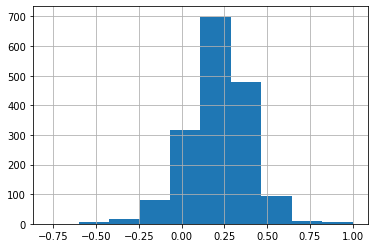

In [67]:
#Let's visualize the data further using a histogram
# reviews['review_polarity_score'] = TextBlob(reviews['Review']).sentiment.polarity

def func_polarity(review):
  return TextBlob(review).sentiment.polarity

reviews['review_polarity_score'] = reviews['Review'].apply(lambda x : func_polarity(x))
reviews['review_polarity_score'].hist()


#Now that's certainly helpful as it tells us that most of the reviews are positive with max polarity score going till 1
#While there are negative reviews as well but not only the quantity is less most of them are concentrated within -0.25

In [68]:
#Now lets check how many negative, positve and neutral reviews are there
#We make a function sentiment

def sentiment(polarity_score):
  if polarity_score > 0:
    return 'postive'
  elif polarity_score == 0:
    return 'neutral'
  else:
    return 'negative'
#Here we are using map in lambda as opposed to apply because here I want to change these values to positive, negative and neutral
reviews['review_polarity'] = reviews['review_polarity_score'].map(lambda x: sentiment(x))


In [69]:
data_canada = reviews['review_polarity']
fig = px.bar(data_canada, x= reviews.review_polarity.value_counts().index, y= reviews.review_polarity.value_counts())
fig.show()

**This further proves that the positve reviews are in much higher quantity than the negative and neutral reviews**

# *Now we can perform Named Entity Recognition (NER) to have further understanding about the relevant entities in the customer review like name, location, facilities etc.*

In [70]:
import spacy #one of the standard libraries for NER

In [71]:
nlp = spacy.load("en_core_web_sm")

In [72]:
doc = nlp(reviews['Review'][10])
[(x.text, x.label) for x in doc.ents]

[]

In [73]:
reviews['Review'][10]

'Very clean and friendly and I love the location The restaurant that is inside was excellent for food and service the bathrooms are a little small because they’re vintage but overall I would definitely stay again\n  \n  Read more\n  Read less'

In [74]:
from spacy import displacy

displacy.render(doc, style='ent')



/usr/lib/python3.7/runpy.py:193: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



'<div class="entities" style="line-height: 2.5; direction: ltr">Very clean and friendly and I love the location The restaurant that is inside was excellent for food and service the bathrooms are a little small because they’re vintage but overall I would definitely stay again\n  \n  Read more\n  Read less</div>'

In [75]:
from collections import Counter

In [76]:
def NER(review):
    doc=nlp(review)
    return [X.label_ for X in doc.ents]

NamedEntity=reviews['Review'].\
    apply(lambda x : NER(x))
NamedEntity=[x for value in NamedEntity for x in value]



In [77]:
counter=Counter(NamedEntity)
count=counter.most_common()

In [78]:
import seaborn as sns

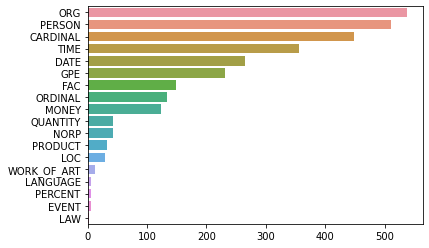

In [79]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

We can see that ORG(companies, agencies, institutions) dominate the reviews followed by PERSON(People including fictional) and CARDINAL(Numerals that do not fall under another type)